In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import random

In [2]:
path = 'hackathon/Dataset'
data_dir = pathlib.Path(path)

In [3]:
class_names = np.array([sorted(item.name for item in data_dir.glob("*"))])
class_names

array([['Mild_Demented', 'Moderate_Demented', 'Non_Demented',
        'Very_Mild_Demented']], dtype='<U18')

In [4]:
imageCount = len(list(data_dir.glob("*/*.jpg") ))
imageCount

6400

In [6]:
def plot(path,class_name):
    print(path)
    plt.figure(figsize=(8,8))
    img = plt.imread(path)
    plt.xticks([])
    plt.yticks([])
    plt.title("Class Name: "+class_name)
    plt.imshow(img)

hackathon\Dataset\Mild_Demented\mild_479.jpg


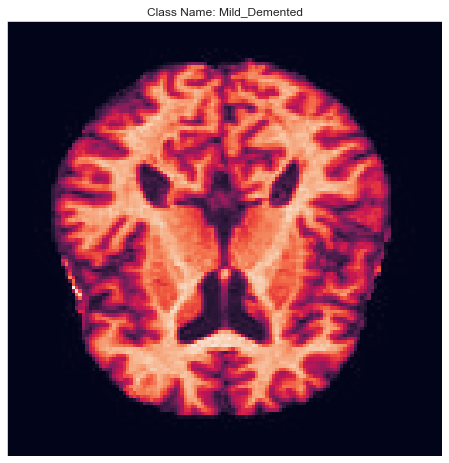

In [7]:
Mild_Demented = random.choice(list(data_dir.glob("Mild_Demented/*.jpg")))
plot(str(Mild_Demented),"Mild_Demented")

hackathon\Dataset\Moderate_Demented\moderate_29.jpg


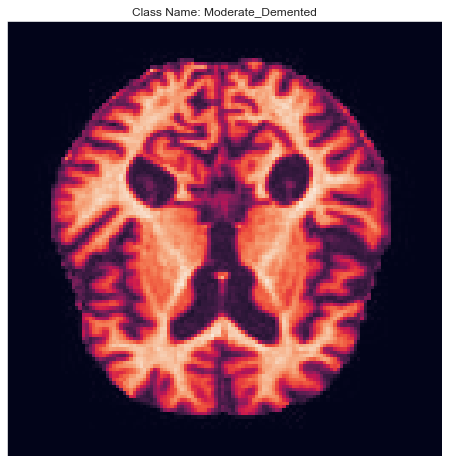

In [8]:
Moderate_Demented = random.choice(list(data_dir.glob("Moderate_Demented/*.jpg")))
plot(str(Moderate_Demented),"Moderate_Demented")

hackathon\Dataset\Non_Demented\non_3140.jpg


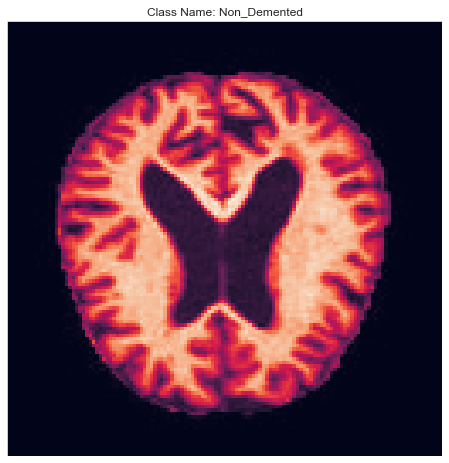

In [9]:
Non_Demented = random.choice(list(data_dir.glob("Non_Demented/*.jpg")))
plot(str(Non_Demented),"Non_Demented")

hackathon\Dataset\Very_Mild_Demented\verymild_395.jpg


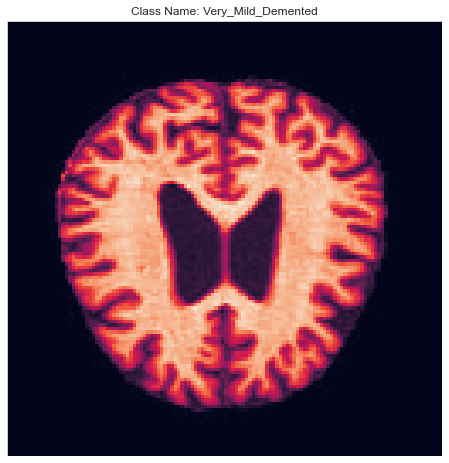

In [10]:
Very_Mild_Demented = random.choice(list(data_dir.glob("Very_Mild_Demented/*.jpg")))
plot(str(Very_Mild_Demented),"Very_Mild_Demented")

In [12]:
batch_size = 32
img_height = 224
img_width = 224

In [13]:
from keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
                  data_dir,
                  validation_split=0.2,
                  subset="training",
                  seed=123,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)


val_data = image_dataset_from_directory(data_dir,
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)

Found 6400 files belonging to 4 classes.
Using 5120 files for training.
Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


In [14]:
from keras import layers

model = tf.keras.Sequential([

   layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Dropout(0.5),
  layers.Flatten(),

  layers.Dense(128, activation='relu'),
  layers.Dense(4,activation="softmax")
])

In [ ]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=["accuracy"])

In [16]:
epochs = 5
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data,
                    batch_size=batch_size)

Epoch 1/5
160/160 [==============================] - 12s 50ms/step - loss: 1.0288 - accuracy: 0.5123 - val_loss: 0.8784 - val_accuracy: 0.5852
Epoch 2/5
160/160 [==============================] - 8s 49ms/step - loss: 0.8545 - accuracy: 0.6094 - val_loss: 0.7231 - val_accuracy: 0.6844
Epoch 3/5
160/160 [==============================] - 8s 49ms/step - loss: 0.6455 - accuracy: 0.7219 - val_loss: 0.5710 - val_accuracy: 0.7484
Epoch 4/5
160/160 [==============================] - 8s 49ms/step - loss: 0.4409 - accuracy: 0.8209 - val_loss: 0.3261 - val_accuracy: 0.8742
Epoch 5/5
160/160 [==============================] - 8s 50ms/step - loss: 0.3360 - accuracy: 0.8721 - val_loss: 0.2629 - val_accuracy: 0.9047


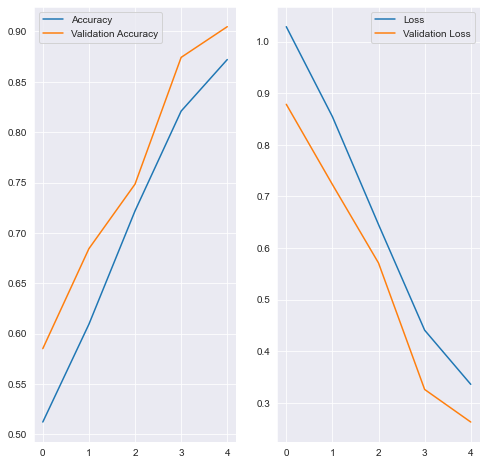

In [17]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

1/1 [==============================] - 0s 13ms/step


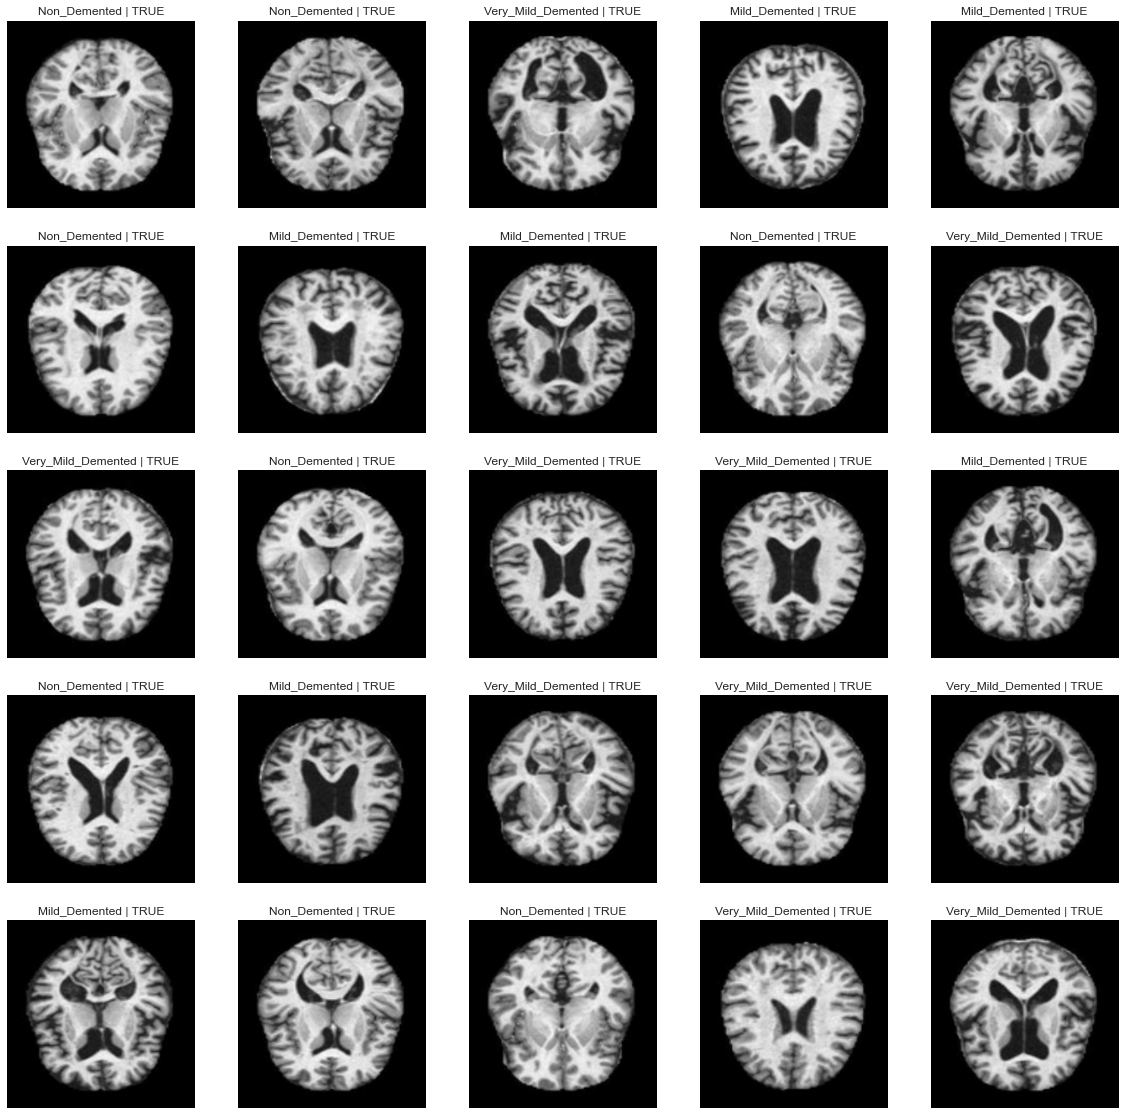

In [18]:
plt.figure(figsize=(20, 20))
class_names = val_data.class_names
result = ' | False'
for images, labels in val_data.take(1):
    for i in range(25):

        ax = plt.subplot(5, 5, i + 1)

        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)

        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'

        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")

In [19]:
model.save("hackathon/modelDusuk")

INFO:tensorflow:Assets written to: hackathon/modelDusuk\assets


INFO:tensorflow:Assets written to: hackathon/modelDusuk\assets


In [36]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model("hackathon/modelDusuk")

1/1 [==============================] - 0s 17ms/step
Predicted Class: Moderate_Demented
Confidence: 0.91


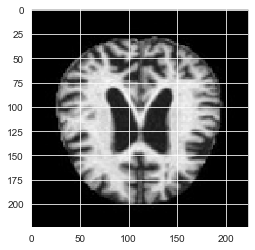

In [38]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
image_path = "hackathonDeneme/moderate_9.jpg"
image = load_img(image_path, target_size=(224, 224))
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)
predictions = loaded_model.predict(image_array)
class_names = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
predicted_class_index = np.argmax(predictions[0])
predicted_class = class_names[predicted_class_index]
confidence = predictions[0][predicted_class_index]
plt.imshow(image)
print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence:.2f}")

Found 1280 files belonging to 4 classes.
20/20 [==============================] - 1s 44ms/step - loss: 0.3563 - accuracy: 0.9227
Test Loss: 0.3563
Test Accuracy: 0.9227
2/2 [==============================] - 0s 14ms/step
                    precision    recall  f1-score   support

     Mild_Demented       0.81      0.91      0.86       180
 Moderate_Demented       0.92      0.92      0.92        12
      Non_Demented       0.95      0.94      0.95       640
Very_Mild_Demented       0.93      0.90      0.91       448

          accuracy                           0.92      1280
         macro avg       0.90      0.92      0.91      1280
      weighted avg       0.92      0.92      0.92      1280



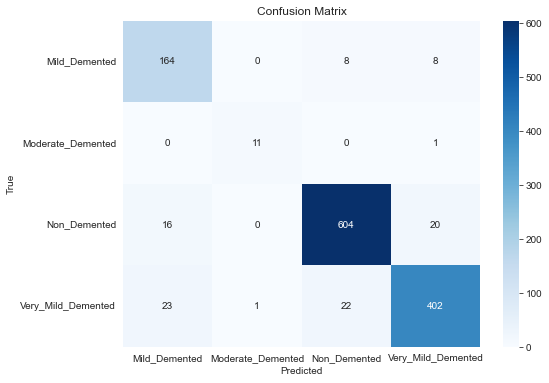

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "output/val",
    seed=123,
    image_size=(224, 224),
    batch_size=64
)
# Load the saved model
loaded_model = tf.keras.models.load_model("hackathon/modelDusuk/")

eval_results = loaded_model.evaluate(test_ds)

# Print evaluation results (loss and accuracy)
print(f"Test Loss: {eval_results[0]:.4f}")
print(f"Test Accuracy: {eval_results[1]:.4f}")

# Predict on the test dataset
y_true = []
y_pred = []

for images, labels in test_ds:
    predictions = loaded_model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)

    y_true.extend(labels.numpy())
    y_pred.extend(predicted_classes)

# Generate a classification report
class_names = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
classification_rep = classification_report(y_true, y_pred, target_names=class_names)
print(classification_rep)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()